In [0]:
%tensorflow_version 2.x

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt

In [10]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(f"Train set shape: {train_images.shape}")
print(f"Train set label: {len(train_labels)}")

print(f"Test set shape: {test_images.shape}")
print(f"Test set label: {len(test_labels)}")

4423680/4422102 [==============================] - 0s 0us/step
Train set shape: (60000, 28, 28)
Train set label: 60000
Test set shape: (10000, 28, 28)
Test set label: 10000
Train set shape: (60000, 28, 28)
Train set label: 60000
Test set shape: (10000, 28, 28)
Test set label: 10000


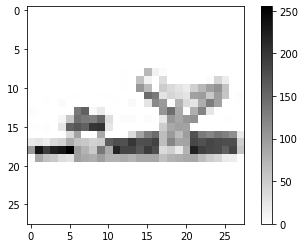

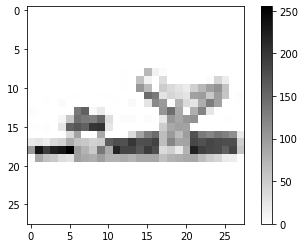

In [11]:
plt.figure()
plt.imshow(train_images[-1], cmap="binary")
plt.colorbar()
plt.show()

Standardize the dataset

In [12]:
#Transformar las 60K imagenes en un vector columna de 28*28
train_images_std = train_images.reshape((60000, 28 * 28)) 
train_images_std = train_images_std.astype("float32")/255

test_images_std = test_images.reshape((10000, 28 * 28))
test_images_std = test_images_std.astype("float32")/255

train_labels_std = to_categorical(train_labels) 
test_labels_std = to_categorical(test_labels)

print(train_labels[-1])
print(train_labels_std[-1])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Create and compile the model

In [19]:
network = keras.Sequential()

# Create our model
network.add(layers.Dense(512, activation='relu', input_shape=( 28*28, )))
network.add(layers.Dense(24, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))
# Test loss: 0.4801672399044037 Test accuracy:0.896399974822998 

network.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

network.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 24)                12312     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                250       
Total params: 414,482
Trainable params: 414,482
Non-trainable params: 0
_________________________________________________________________


#network.add(layers.Dense(512, activation='relu', input_shape=( 28*28, )))
#network.add(layers.Dense(24, activation='relu'))
#network.add(layers.Dense(10, activation='softmax'))

#Test loss: 0.4235382676124573 Test accuracy:0.8988000154495239

### Train the model


In [18]:
network.fit(train_images_std, train_labels_std, epochs=50)

test_loss, test_acc = network.evaluate(test_images_std, test_labels_std) 
print(f"Test loss: {test_loss} Test accuracy:{test_acc}")

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8207 - accuracy: 0.7431
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5469 - accuracy: 0.8221
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4631 - accuracy: 0.8496
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4117 - accuracy: 0.8623
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3803 - accuracy: 0.8681
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3600 - accuracy: 0.8758
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3402 - accuracy: 0.8806
Epoch 8/50
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3263 - accuracy: 0.8864
Epoch 9/50
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3125 - accuracy: 0.8906
Epoch 10/50
1875/1875 [==============================] - 8s 5ms/step - loss: 0.300